In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import popoff
from linear_model import PoolAcrossSessions, LinearModel, pca_session, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("dark_background")

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)

## Load Both PoolAcrossSessions class and example LinearModel class
* PoolAcrossSessions loads every session and has an attribute 'linear_models', a list of len n_sessions containing a LinearModel object for every session
* The PoolAcrossSessions class has methods that match the methods in LinearModel, producing the same plots across sessions
* PAS also computes PC array for each session and saves it into the object. This can be recomputed by setting save_PCA=True.


In [61]:
pas = PoolAcrossSessions(save_PCA=False)
session = pas.sessions[2]  # Example session for some plots
lm = LinearModel(session, pas.times_use)  # Example LinearModel object for some plots

Now loading mouse J048, run 27
/home/jrowland/Documents/code/Vape/run_pkls/J048/run27.pkl
microcontroller trial starts occur on average -73.26 ms from galvo trial starts
False


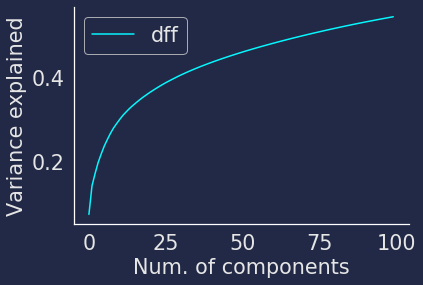

In [71]:
# Varience explained for one session
session = pca_session(session, plot=True)

## Both objects can now flexibly switch between binary and multiclass models. Binary model results below

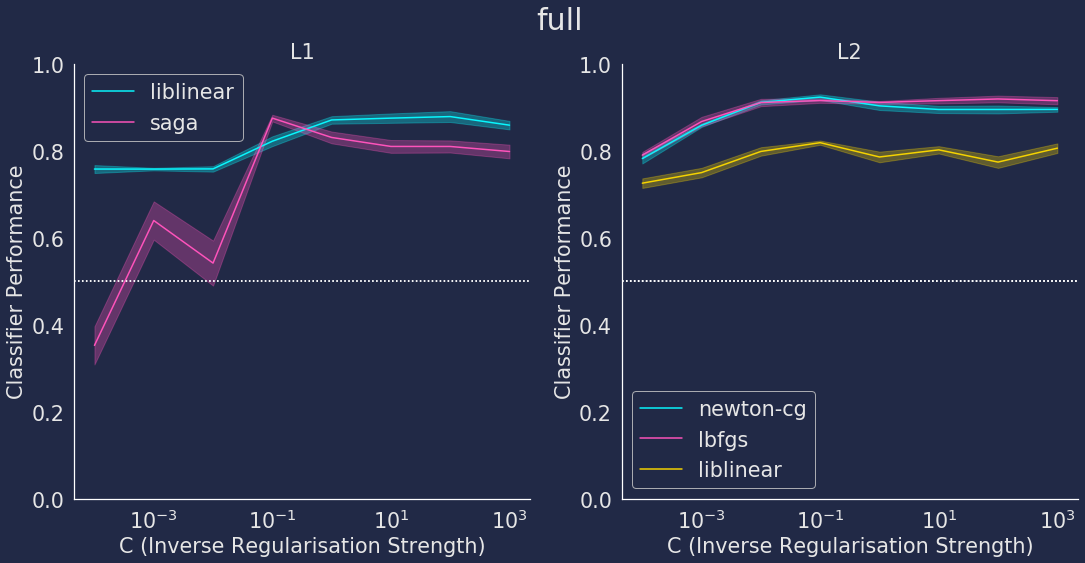

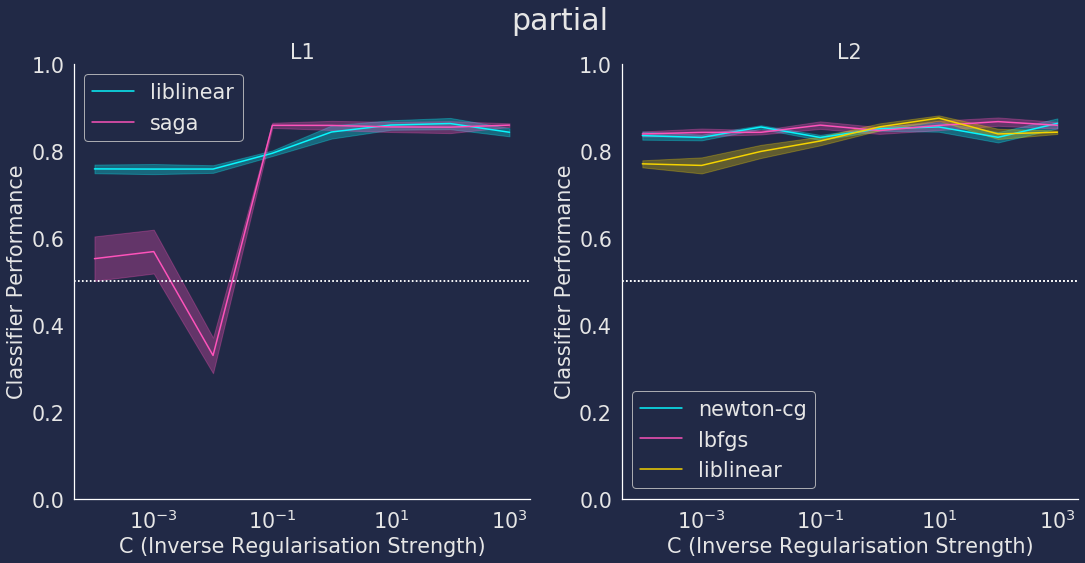

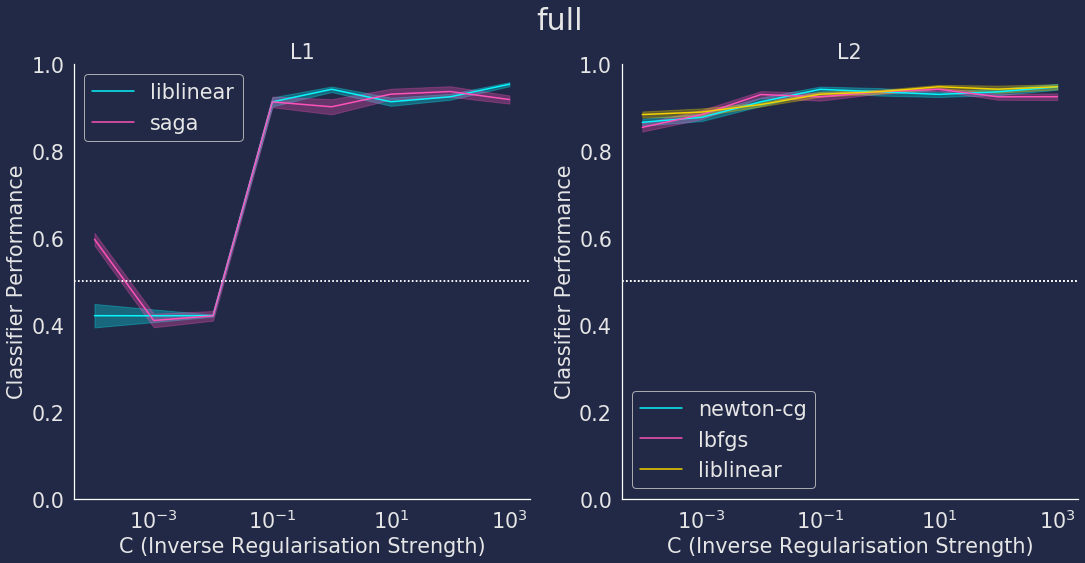

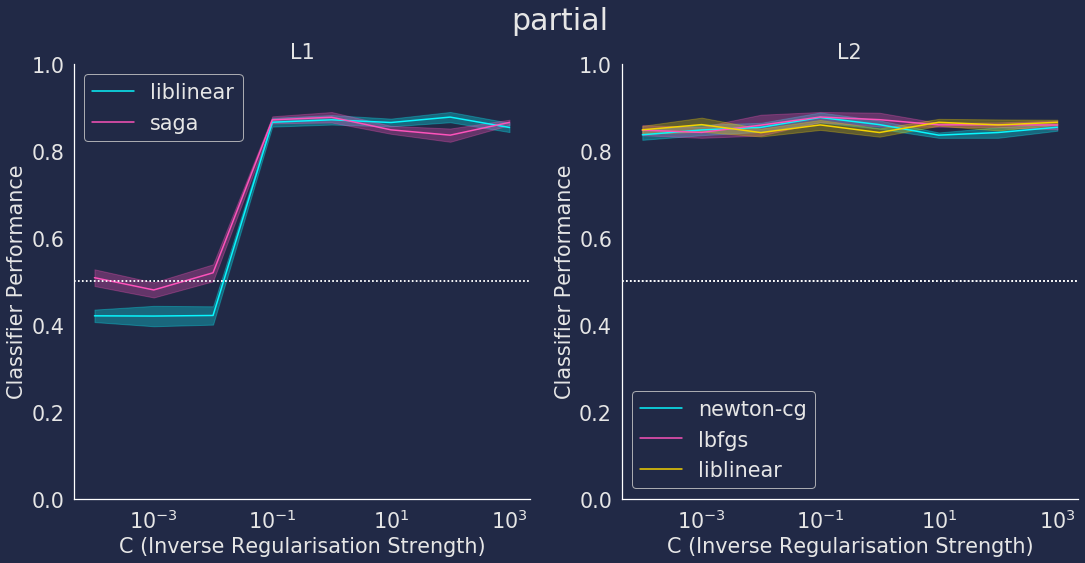

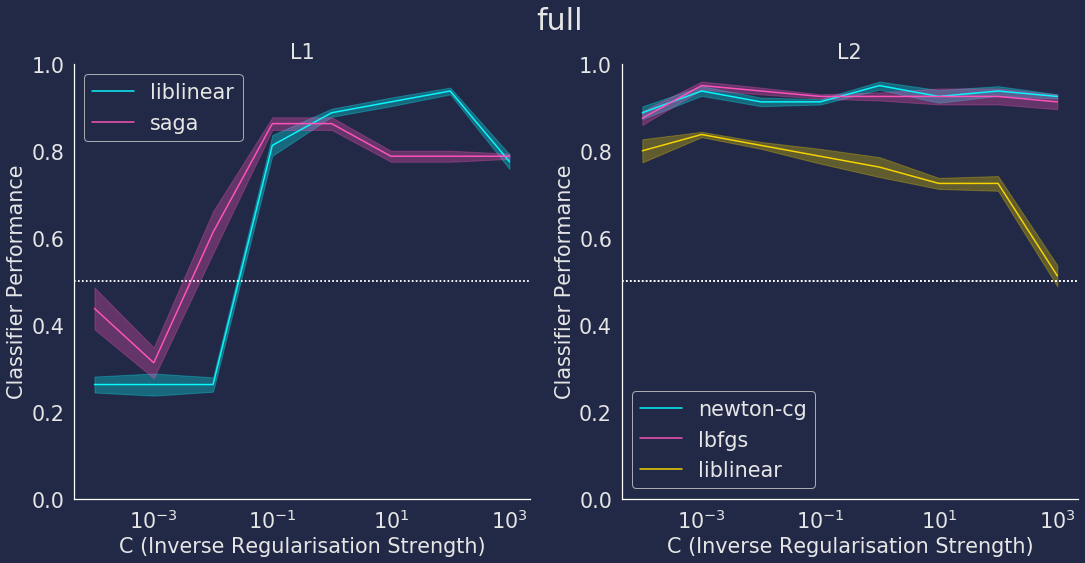

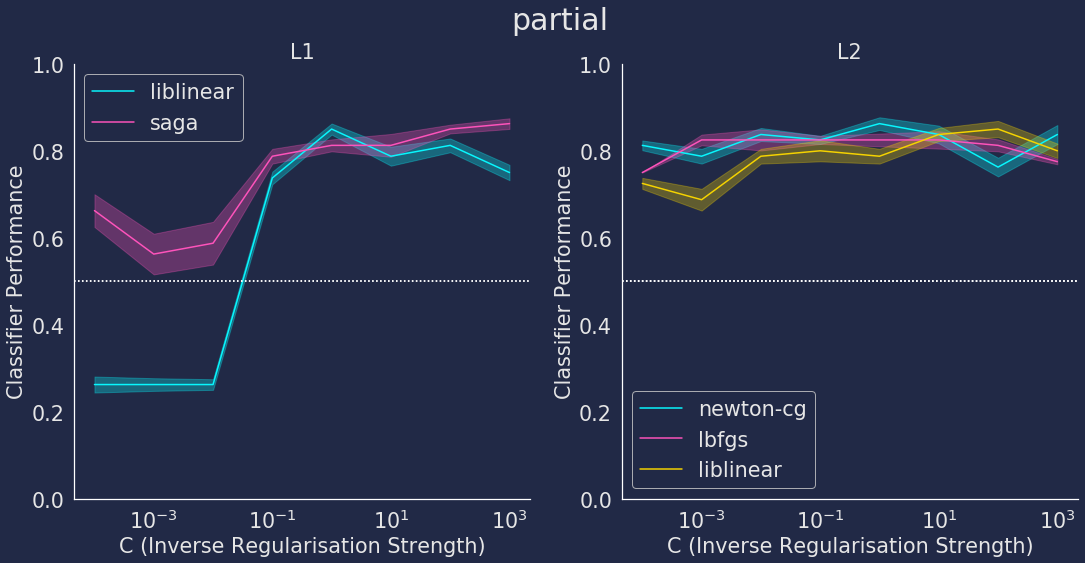

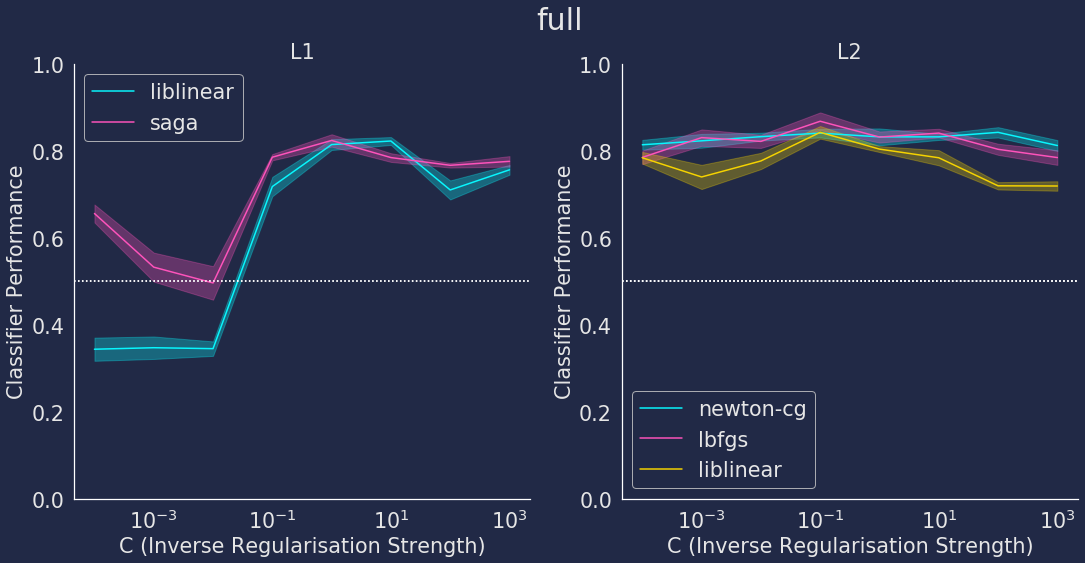

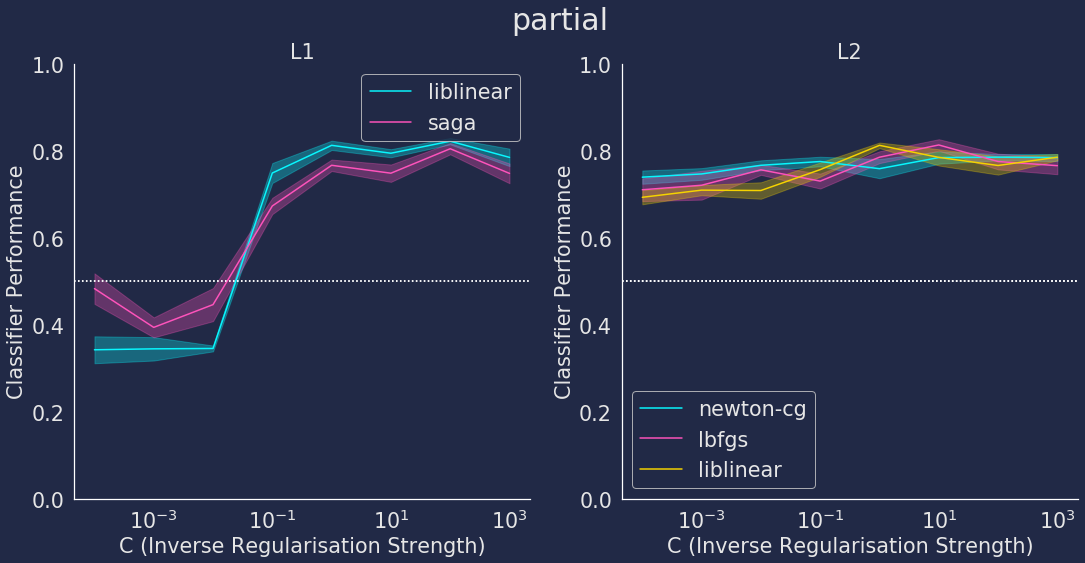

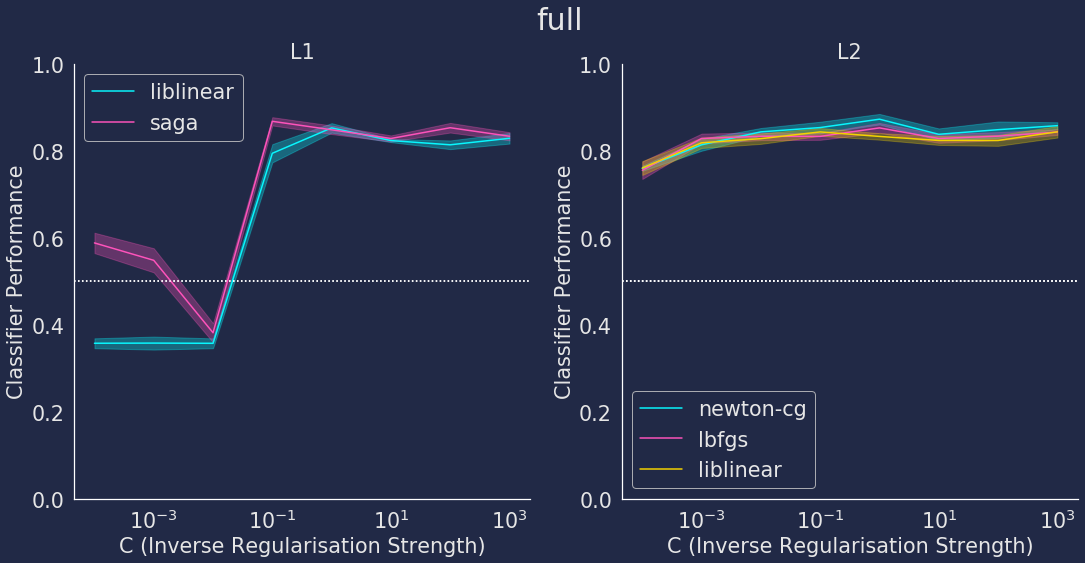

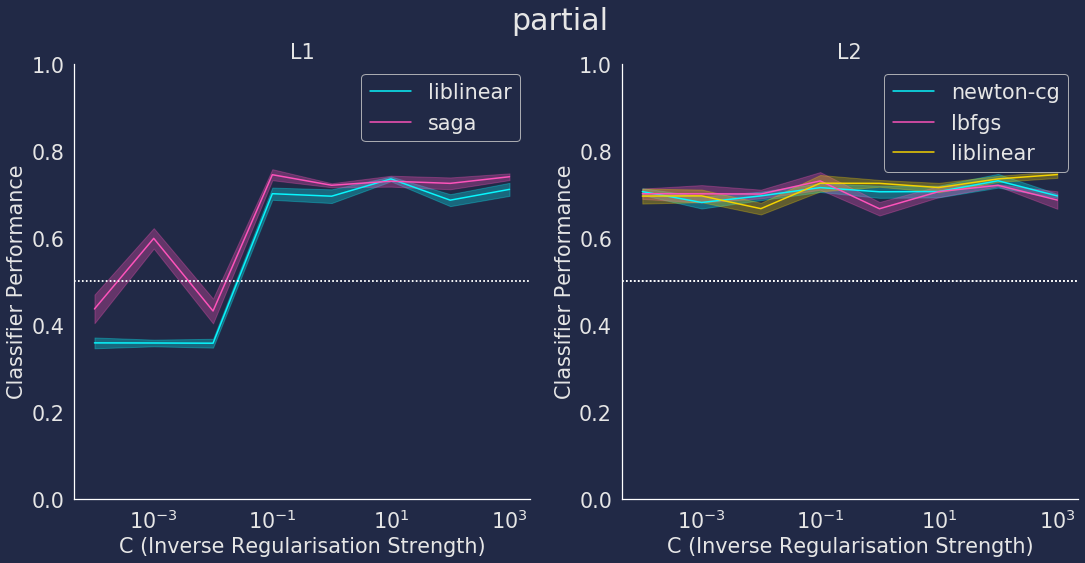

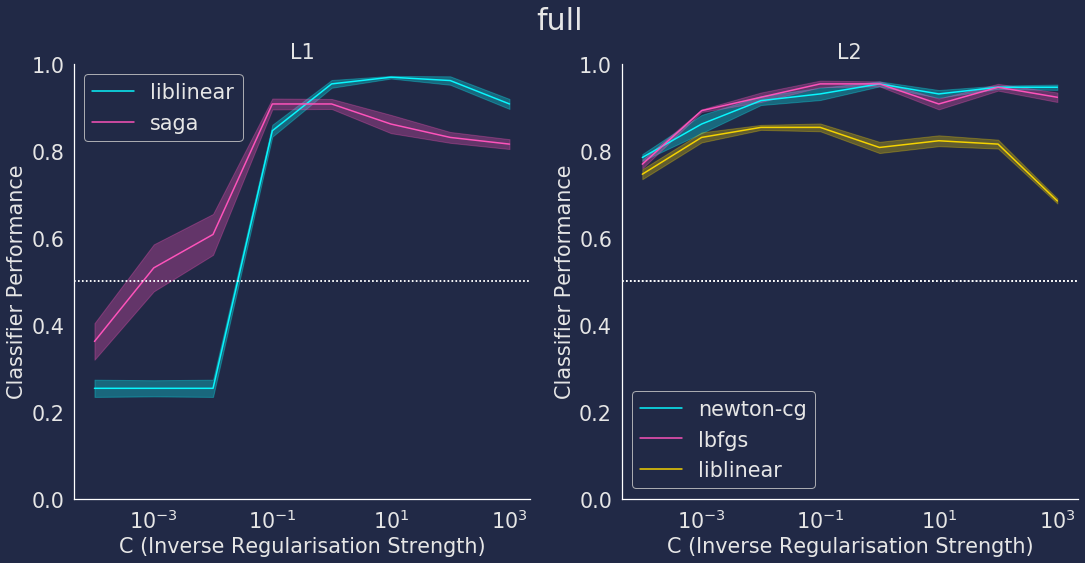

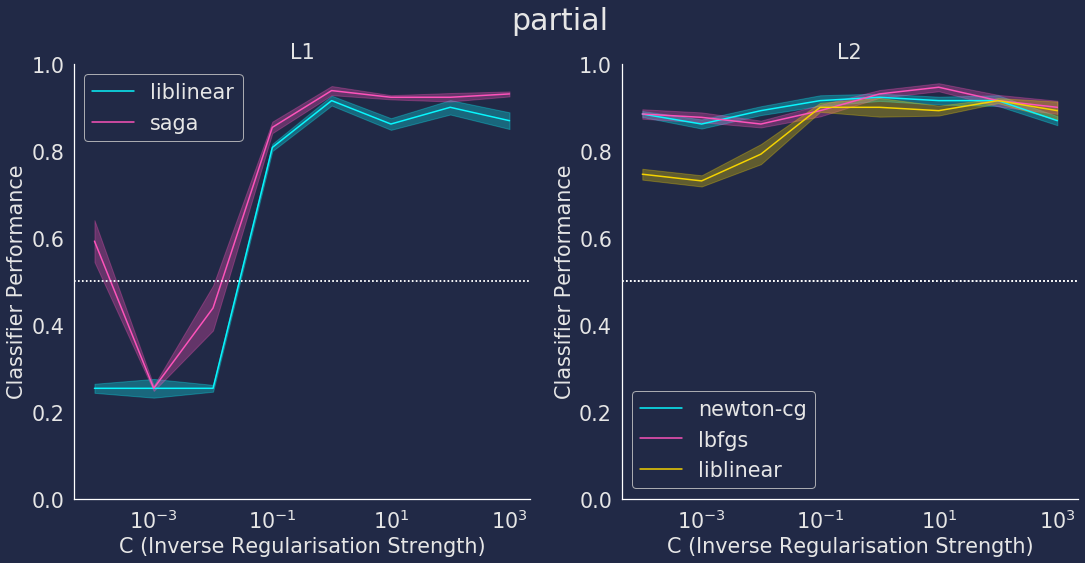

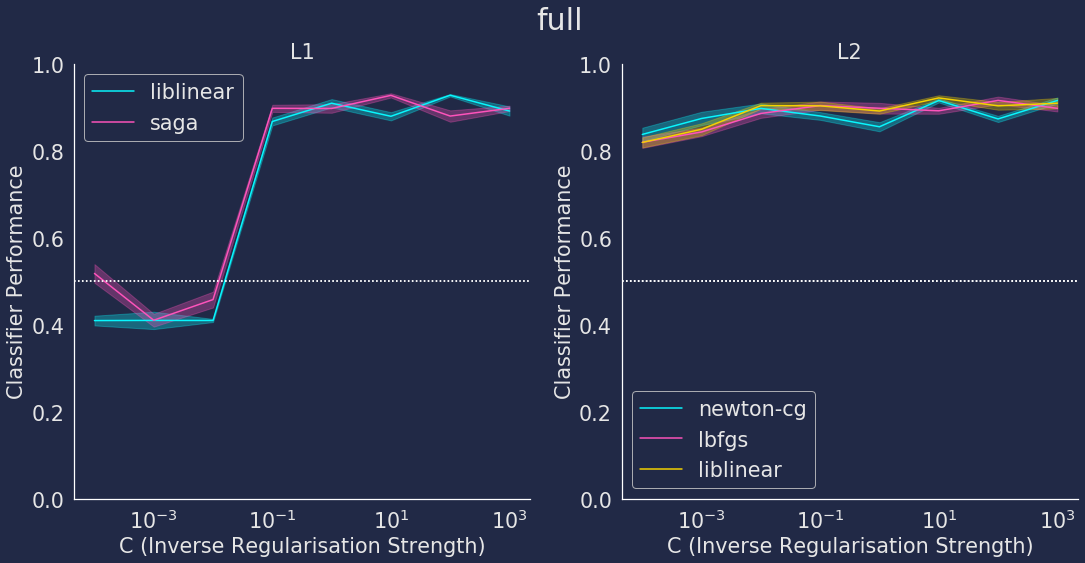

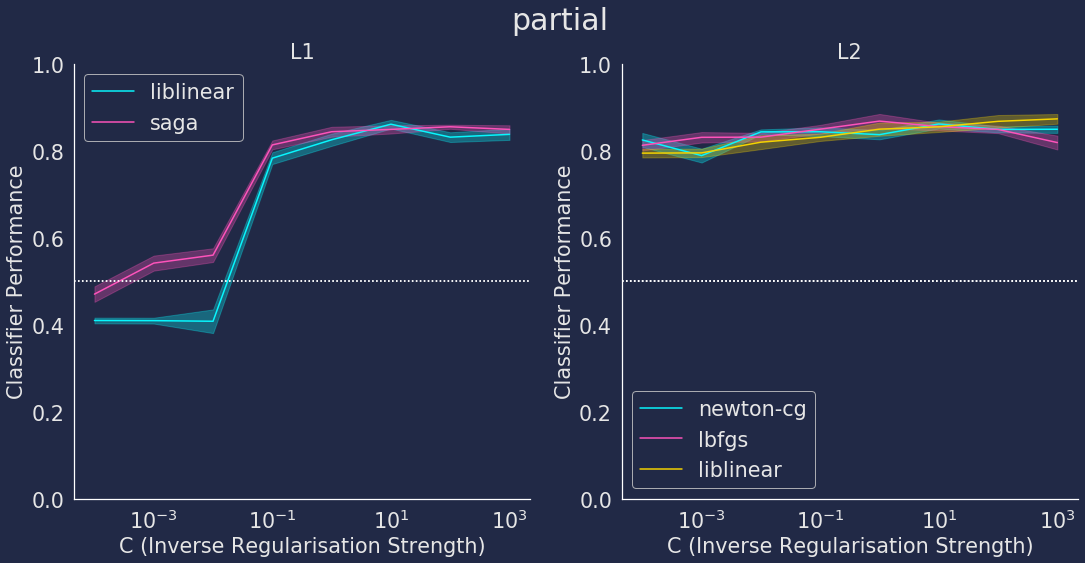

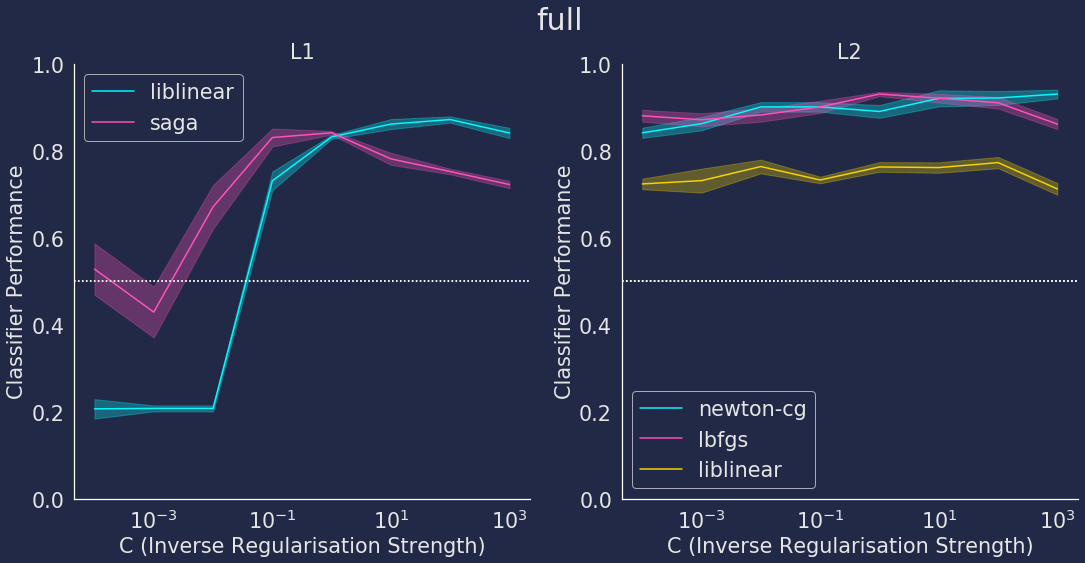

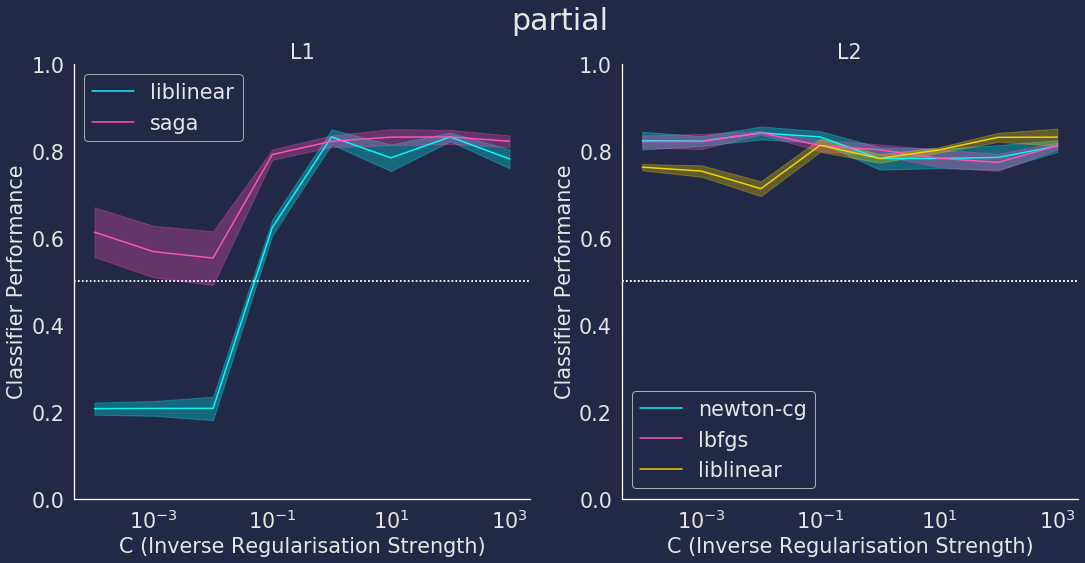

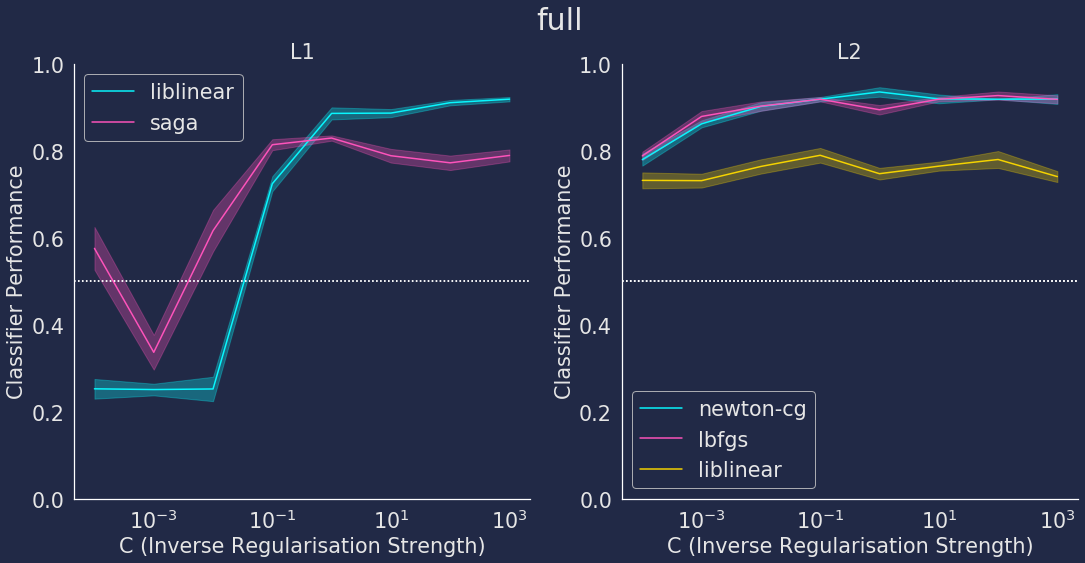

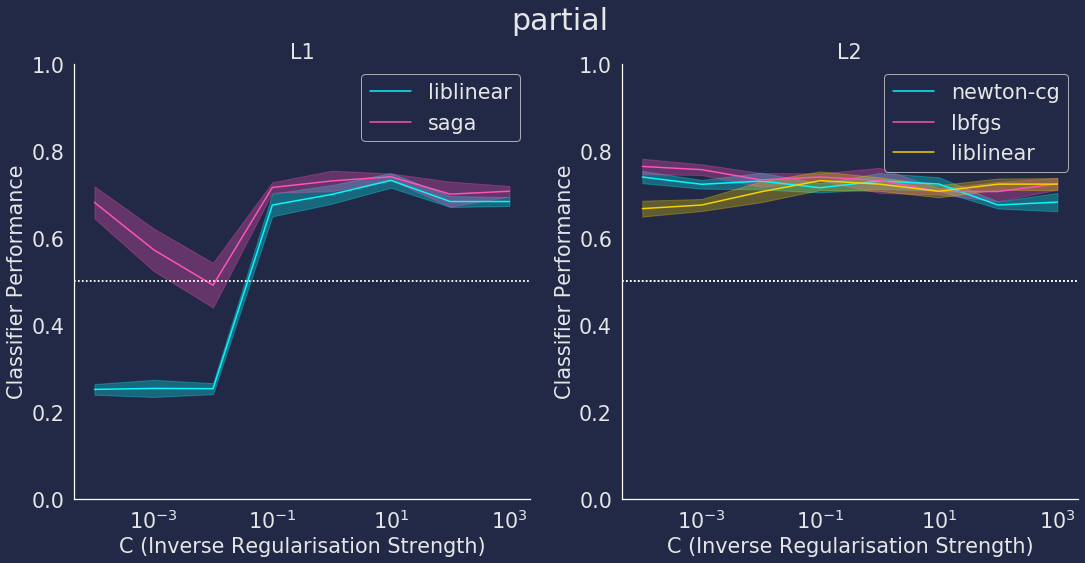

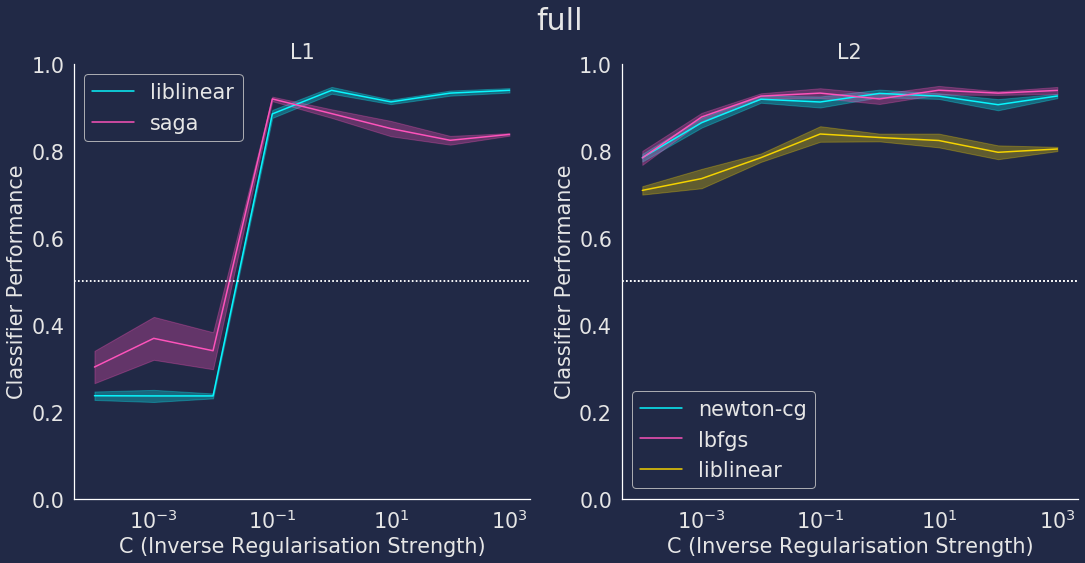

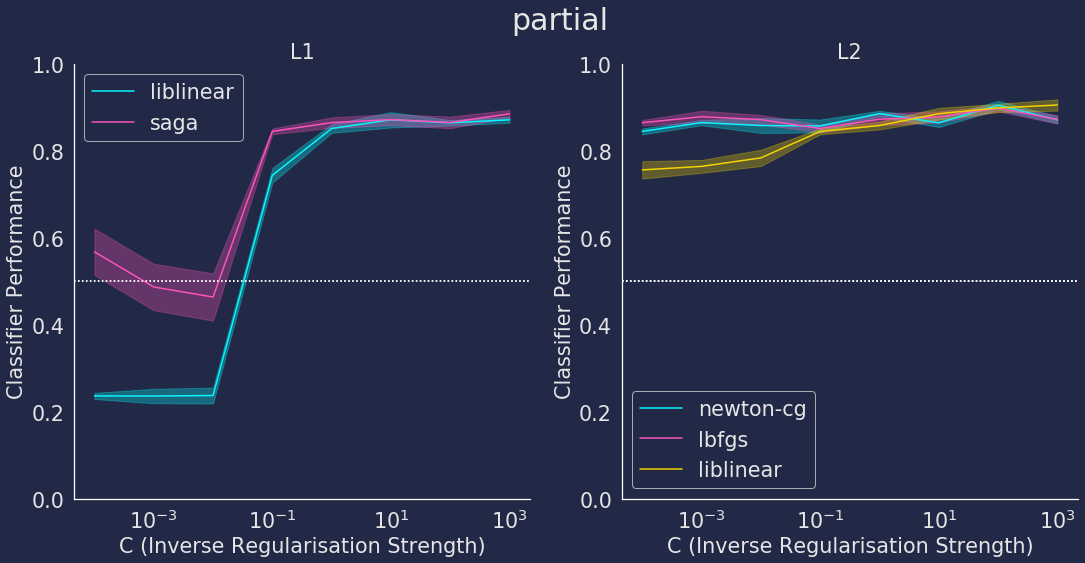

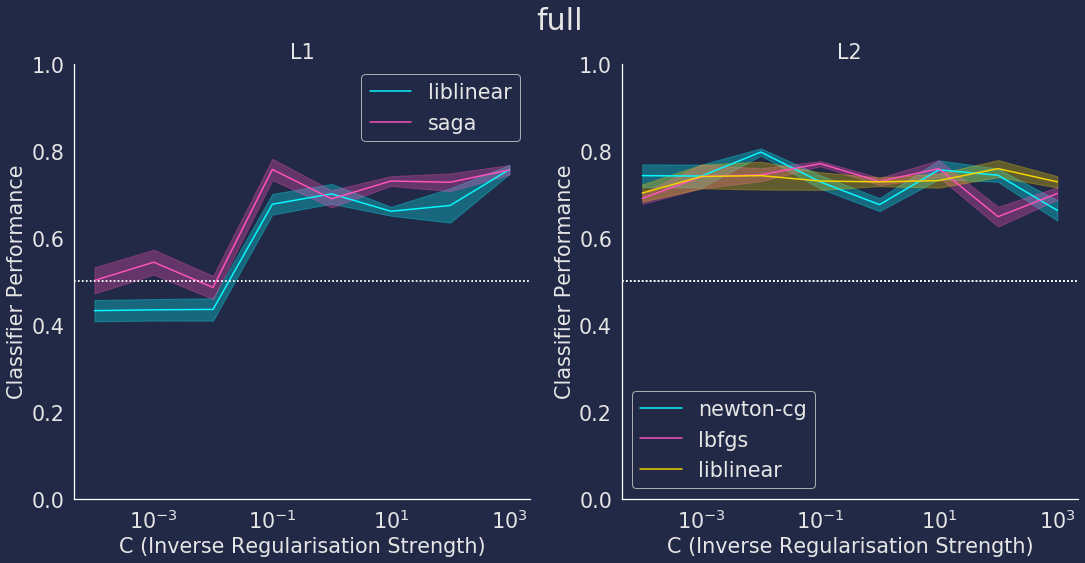

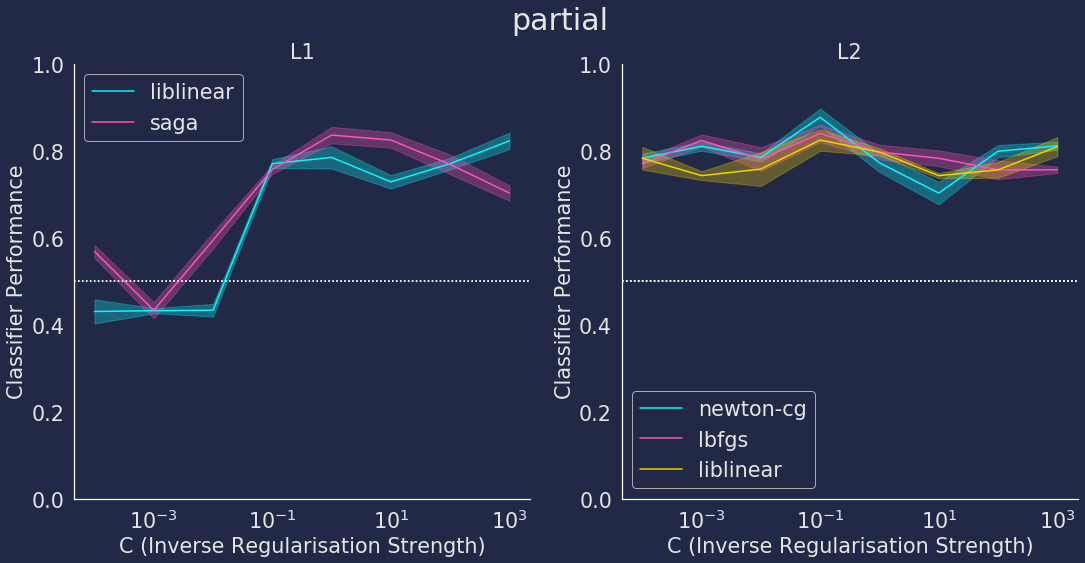

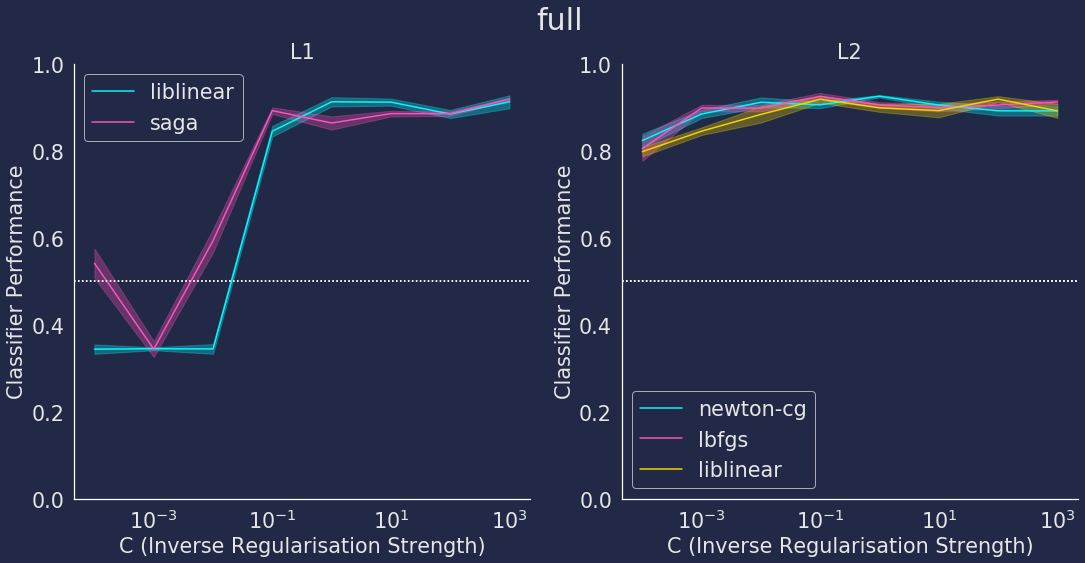

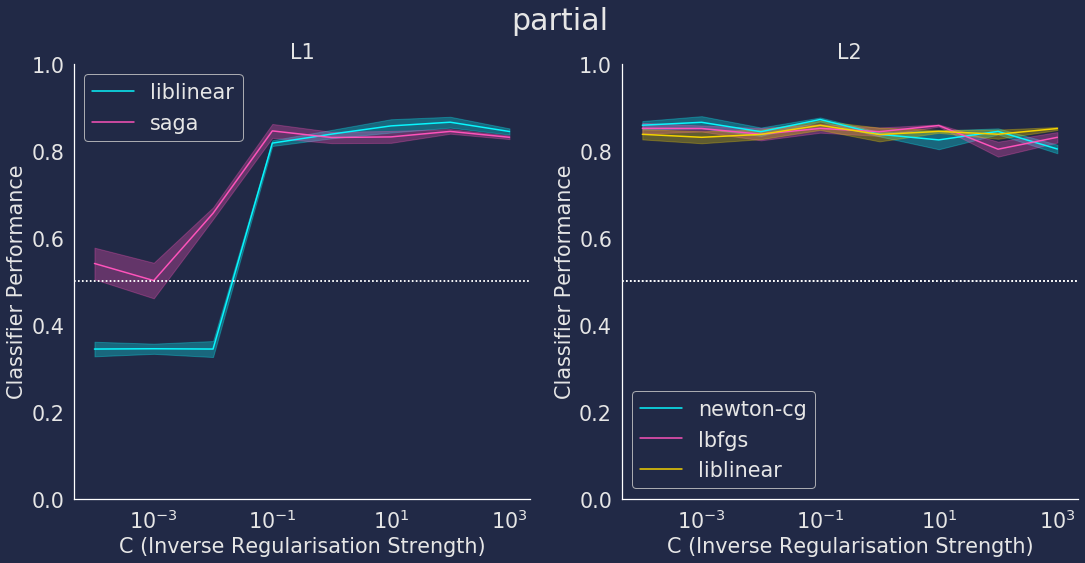

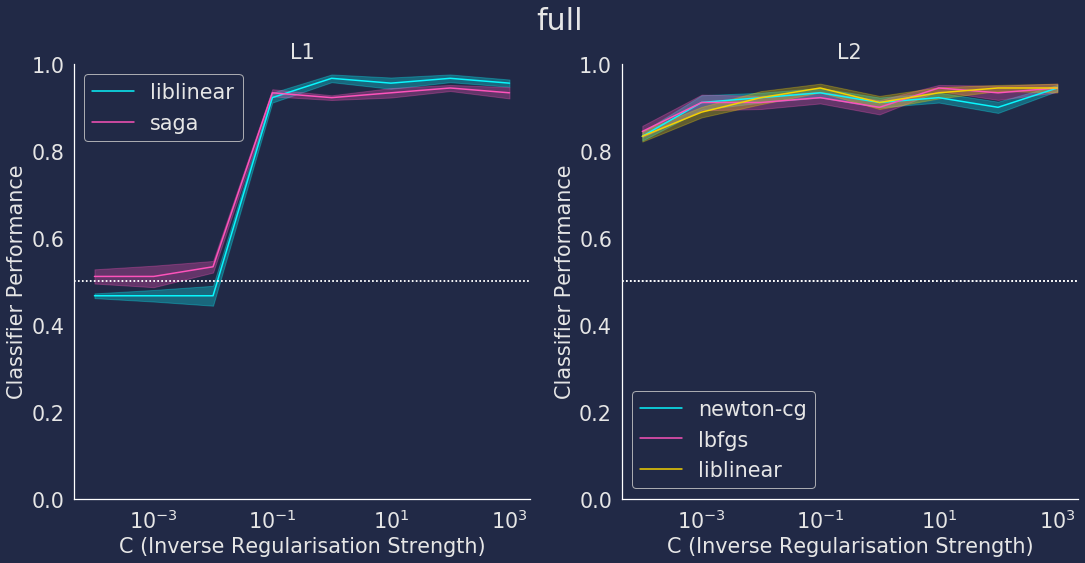

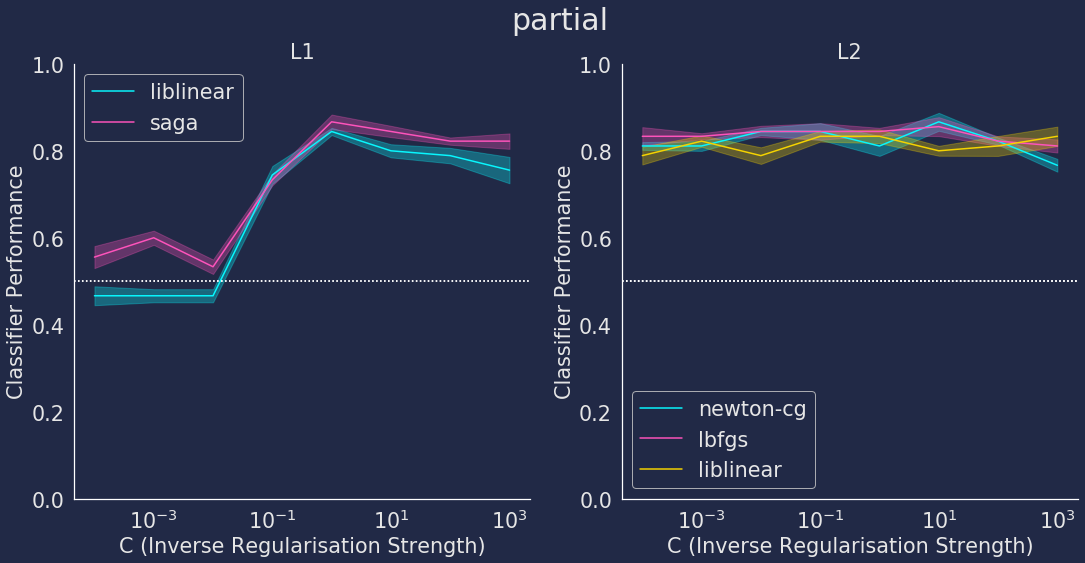

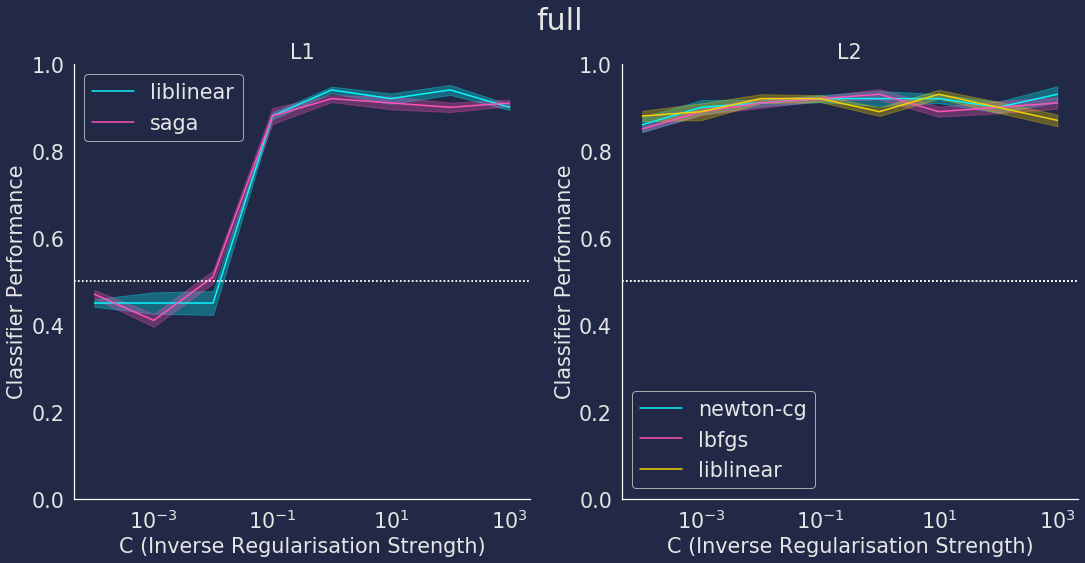

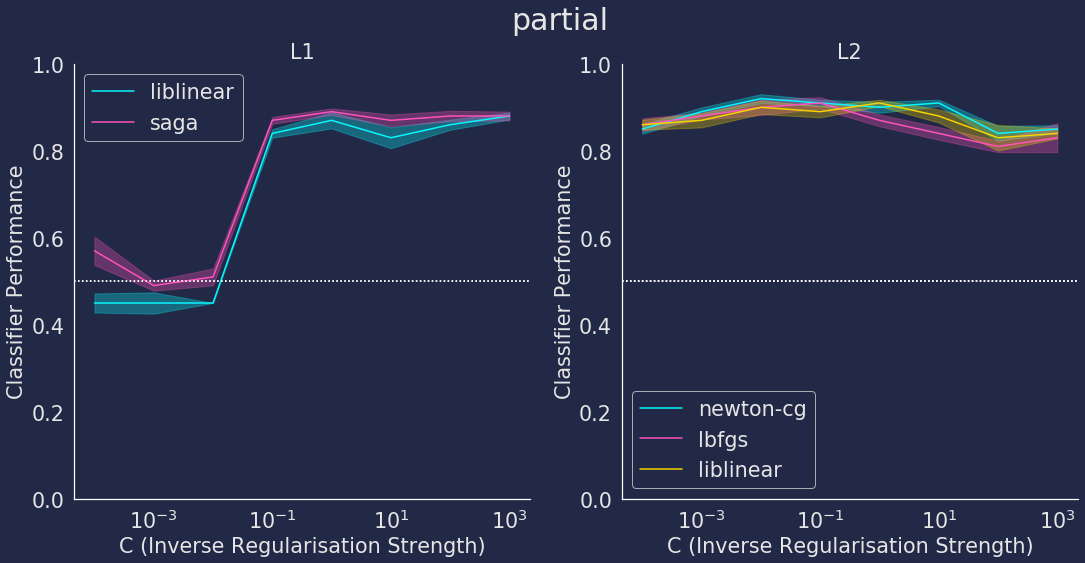

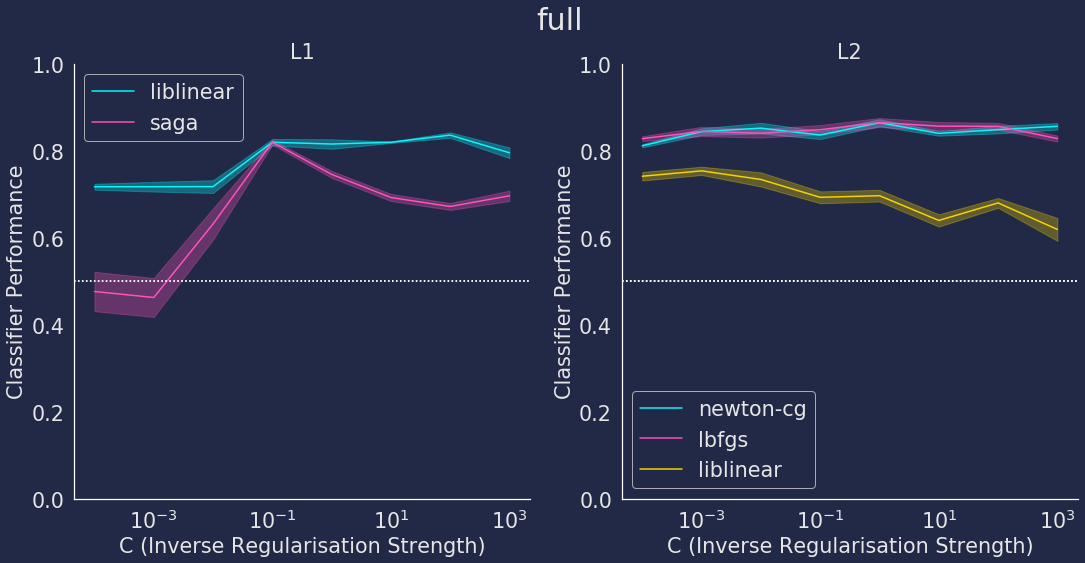

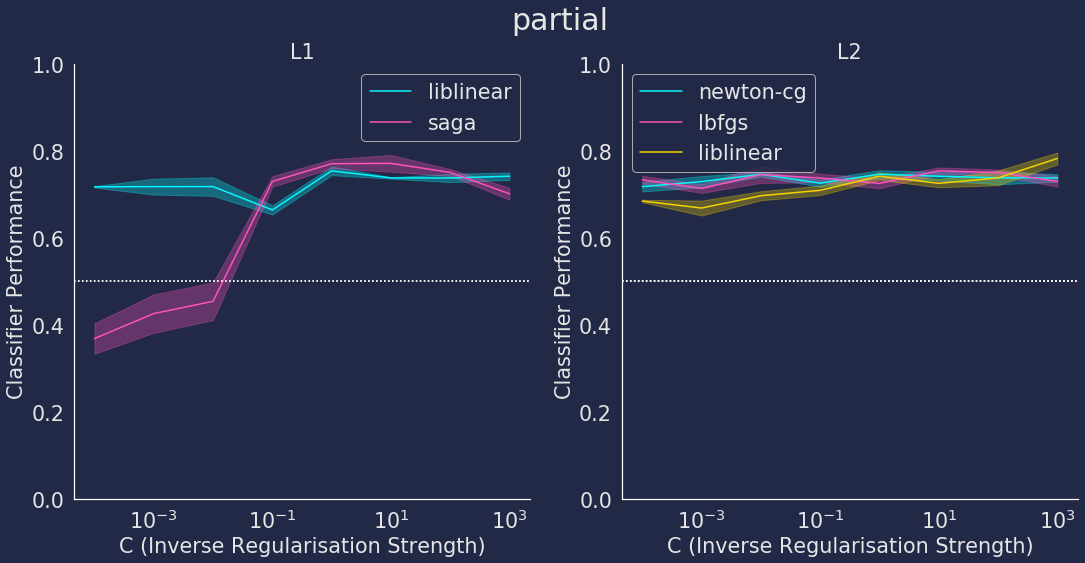

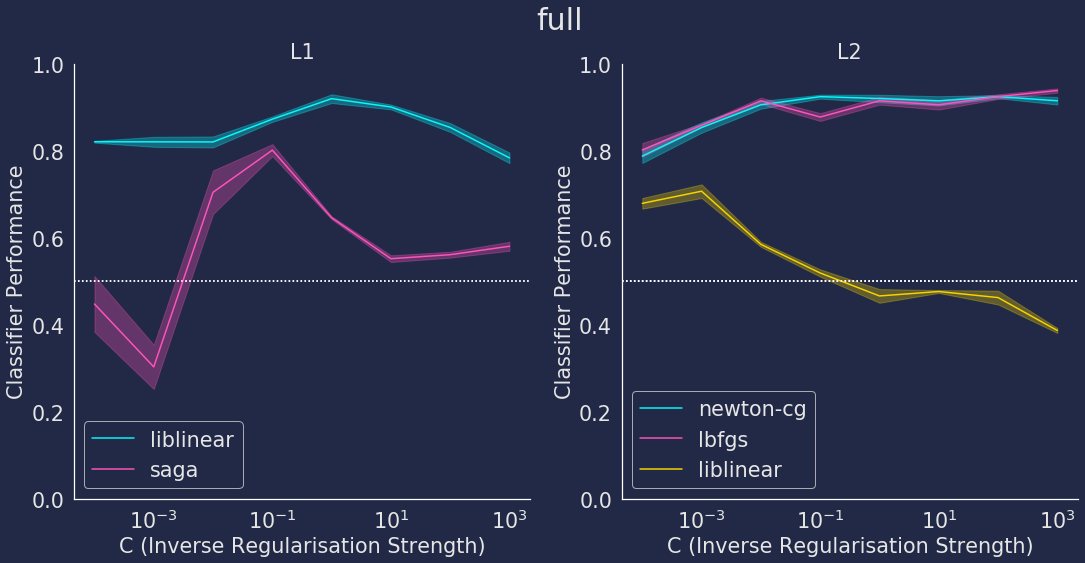

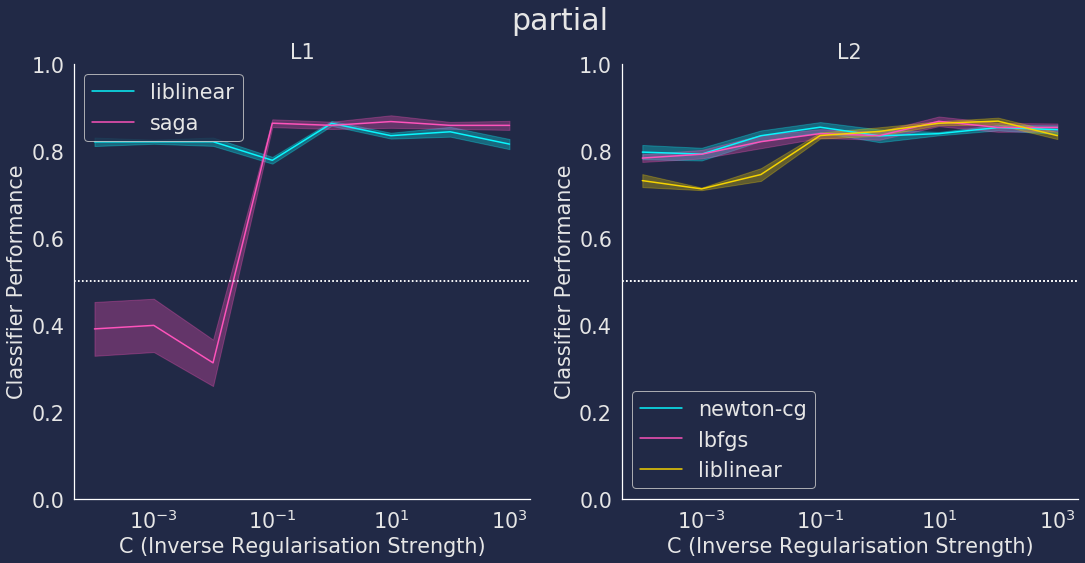

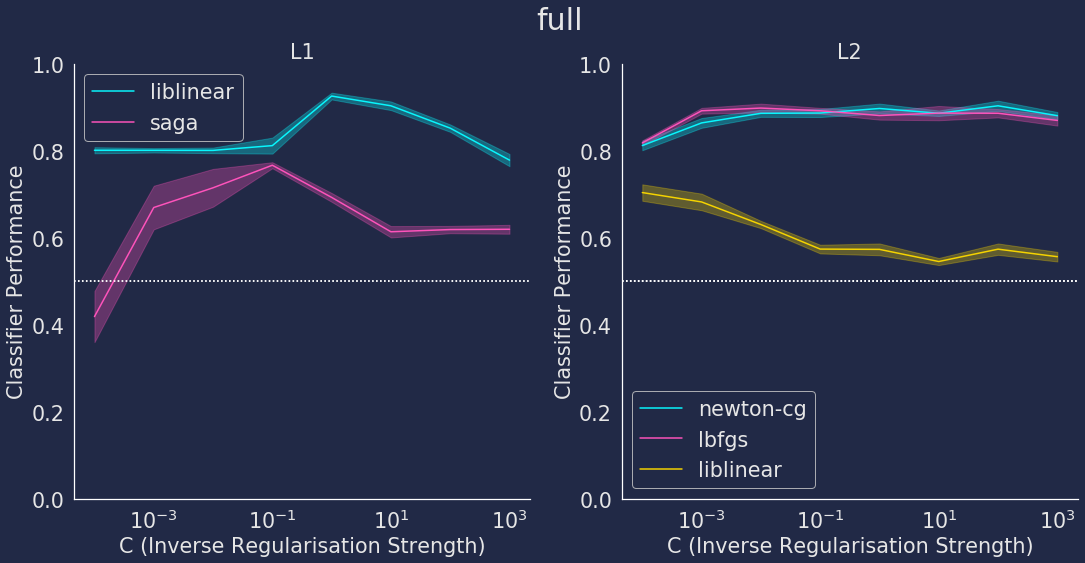

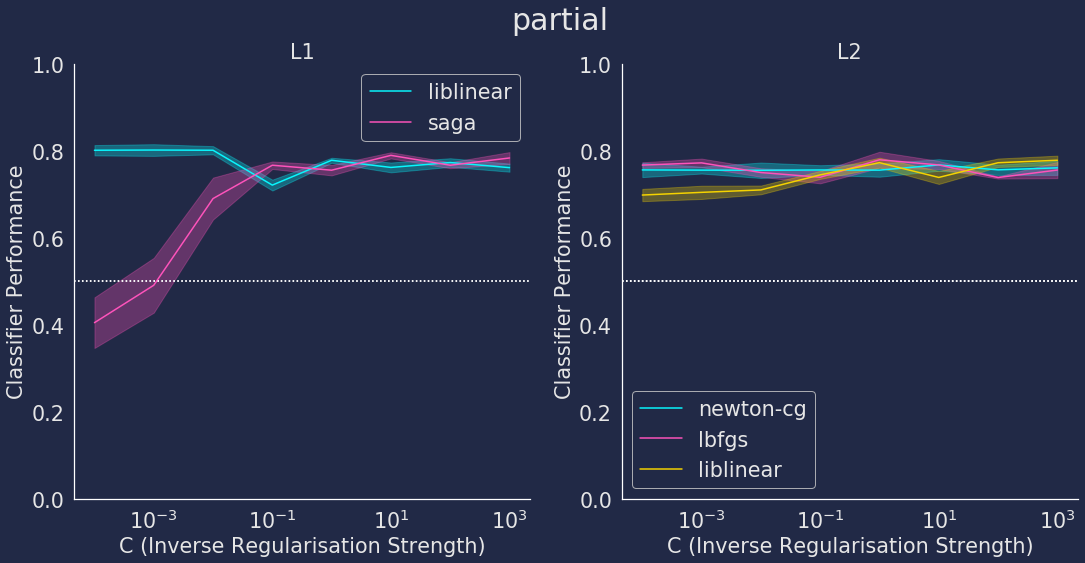

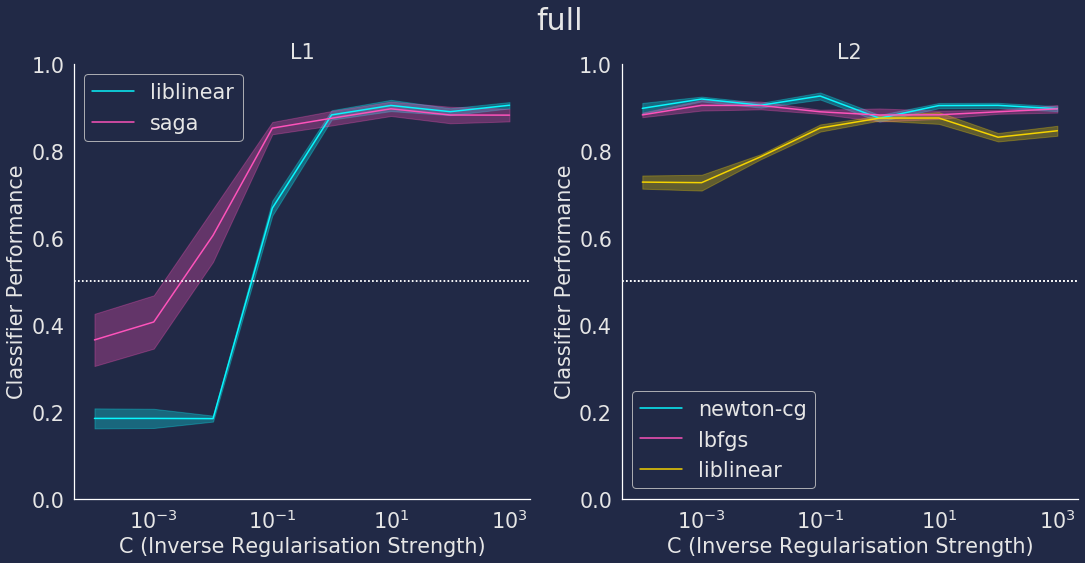

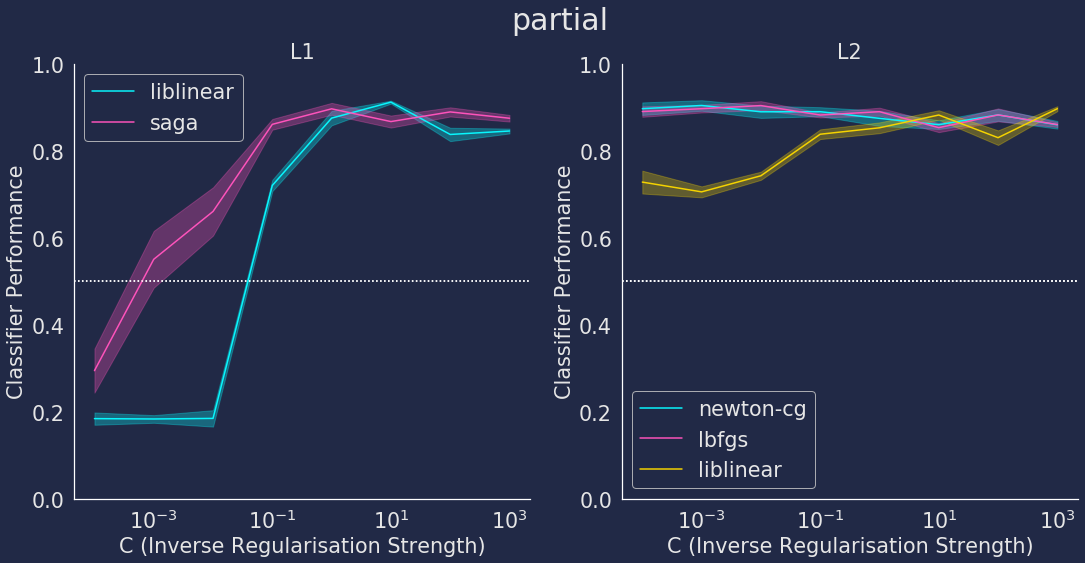

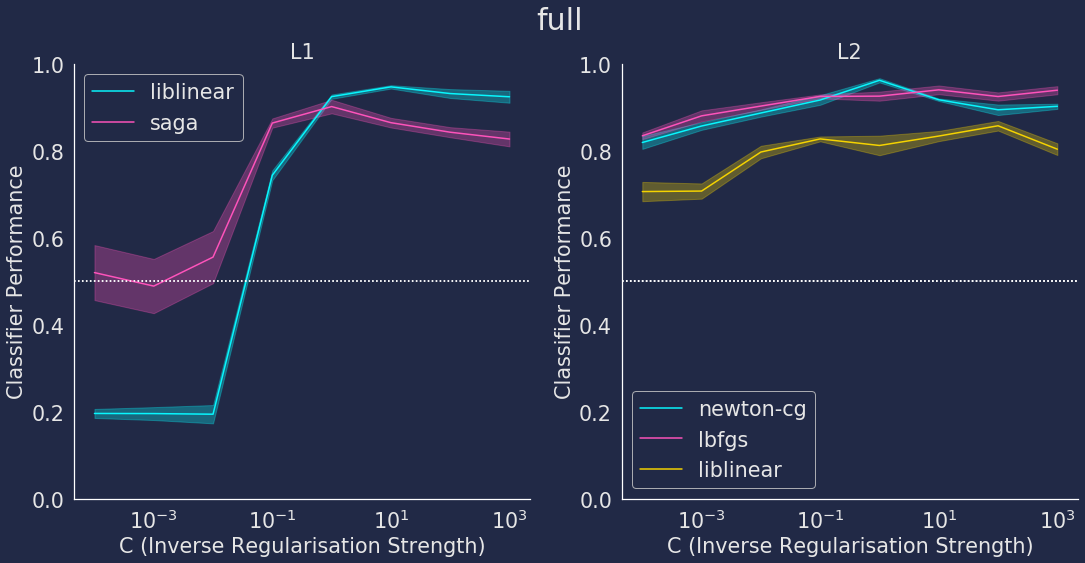

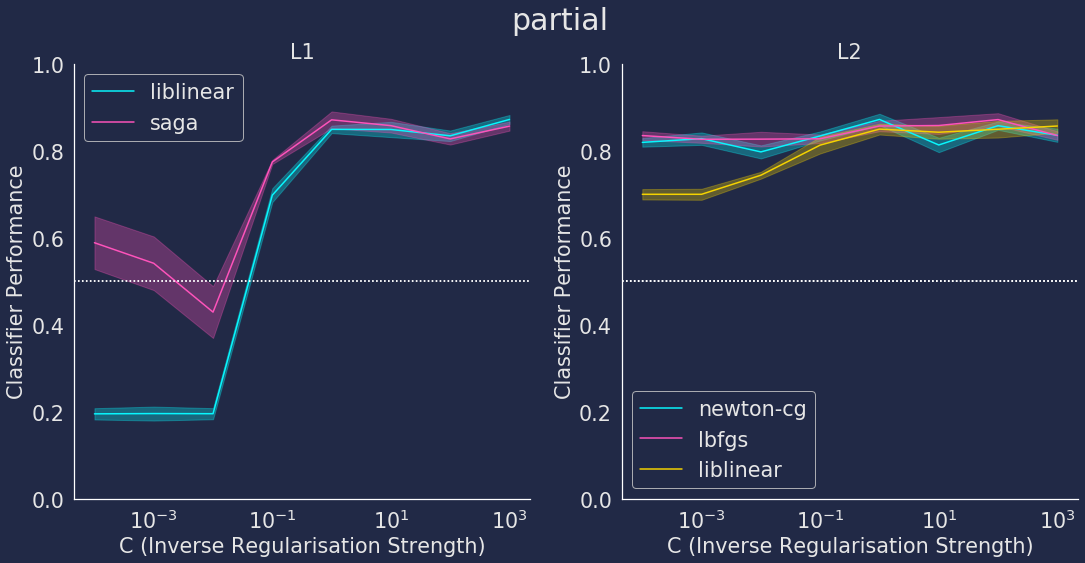

In [83]:
## Churns out loads of plot so you can eyeball which is the best params to use
## across sessions, (is partial correct here? maybe seems high)
pas.model_params_plot()

## Beta coefficients of binary model

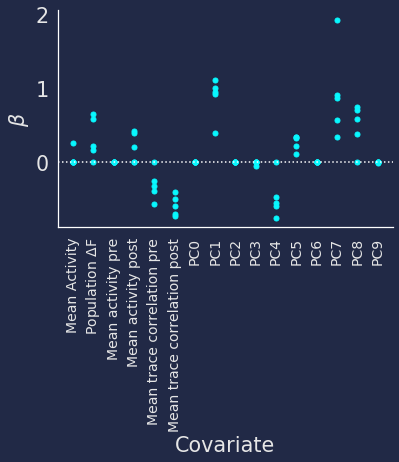

In [77]:
# For a single session
lm.plot_betas(frames='all', model='partial')

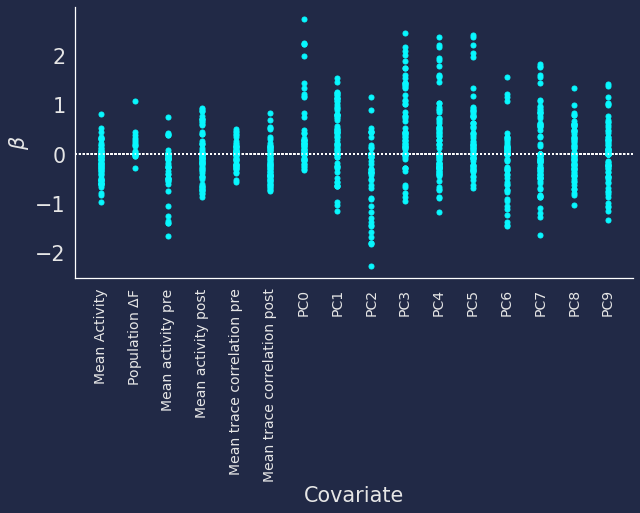

In [78]:
# Across sessions
pas.plot_betas(frames='all', model='partial')

## Performance of partial model as a function of sequentially added covariates

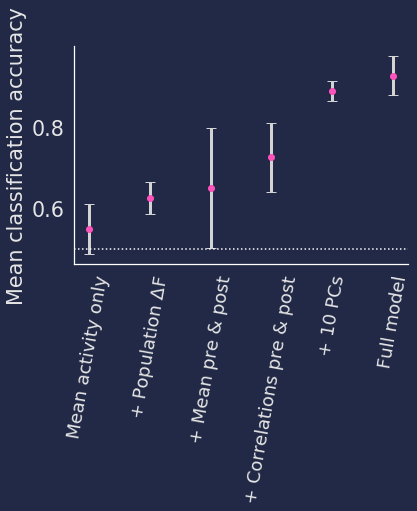

In [81]:
# For a single session
_ = lm.partial_model_performance('all')

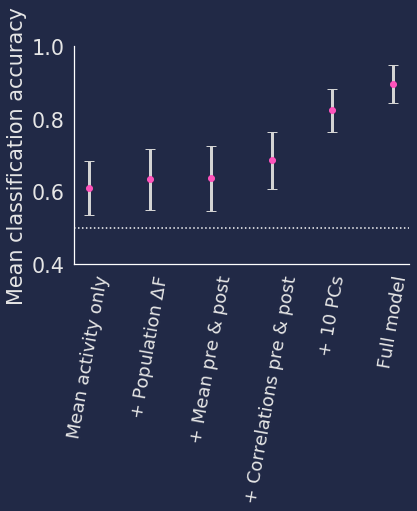

In [82]:
pas.partial_model_performance('all')

## This model has high decoding performance, however if we project it onto false positive and correct rejection trials, performance is still good, so we are looking at largely a lick encoder

Text(0, 0.5, 'Classification Accuracy')

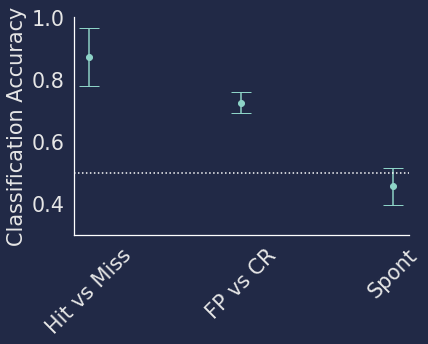

In [95]:
means, stds = pas.project_model('all', 'full')
plt.errorbar([0,1,2], means, stds, marker='o', capsize=10, linestyle='')
plt.ylim(0.3, 1)
plt.xticks([0,1,2], ['Hit vs Miss', 'FP vs CR', 'Spont'], rotation=45)
plt.axhline(0.5, linestyle=':')
plt.ylabel('Classification Accuracy')

## To solve this problem, use a multiclass decoder, which is trained to classify false positive and hits seperately

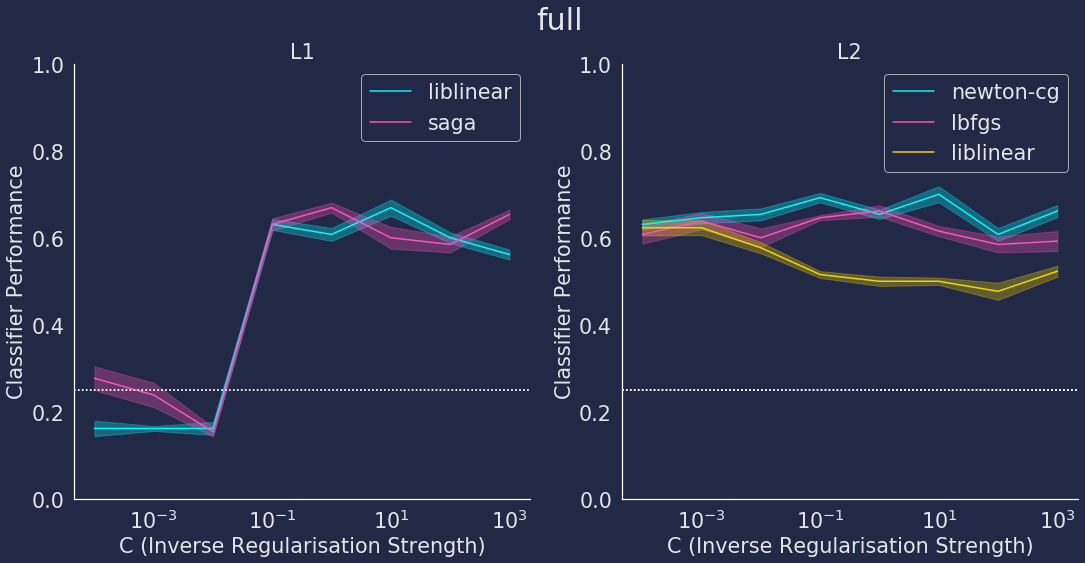

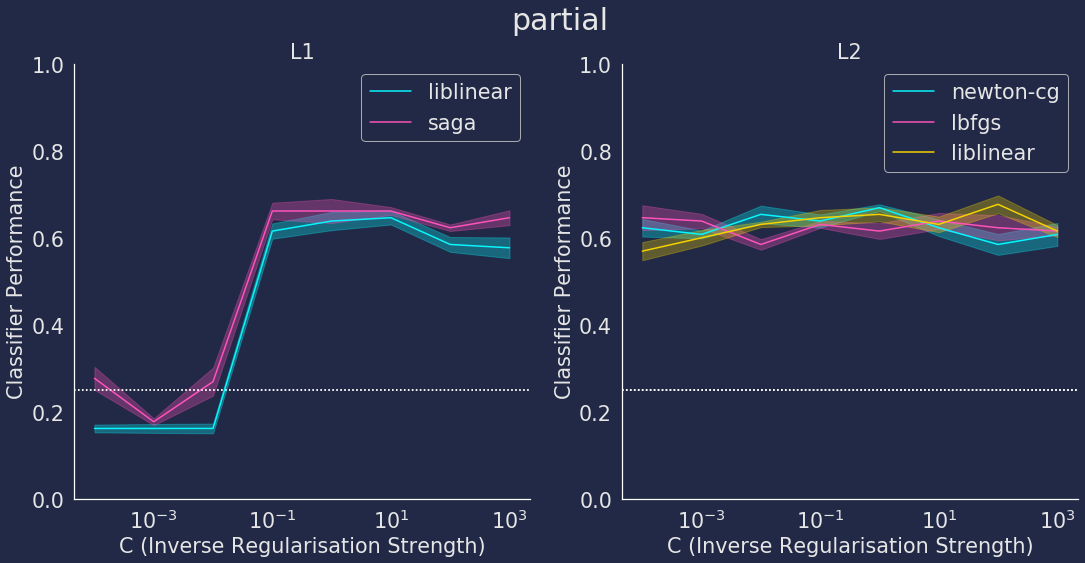

In [85]:
lm.model_params_plot(outcomes=['hit', 'miss', 'fp', 'cr'])

## Uneven trial numbers can lead to bias, so check bias is not too strong

0.6384615384615384


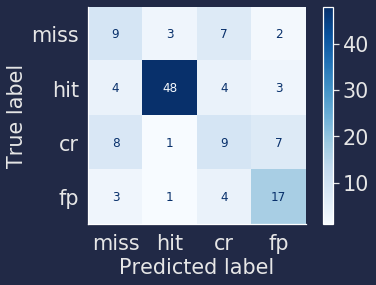

In [86]:
lm = LinearModel(session, pas.times_use)
X, y = lm.prepare_data(model='full', outcomes=['hit', 'miss', 'fp', 'cr'])
acc, std_acc, models = lm.logistic_regression(X, y, 'l1', 0.5, 'saga', compute_confusion=True)
print(acc)

C = np.sum(lm.confusion_matrix, 2)
cmd = ConfusionMatrixDisplay(C, display_labels=lm.encoder.inverse_transform([0,1,2,3]))
cmd.plot(cmap ='Blues')

## Does the target info of the cell impact the model coefs?

In [ ]:
# Get the target info (this should be called on __init__ maybe?)
lm.target_info()

NULL REJECTED!!
15.52% of cells have non-0 coefs


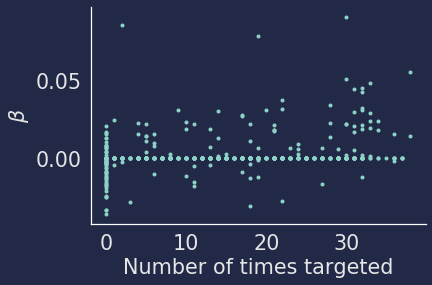

In [117]:
lm.beta_targets_correlation('s1')

NULL REJECTED!!
11.18% of cells have non-0 coefs


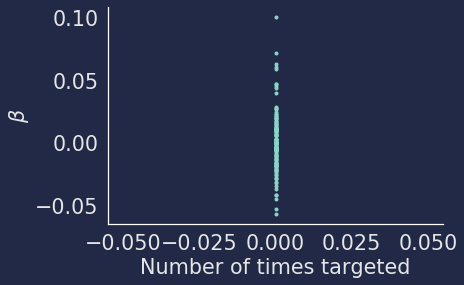

In [118]:
lm.beta_targets_correlation('s2')

(0, 10)

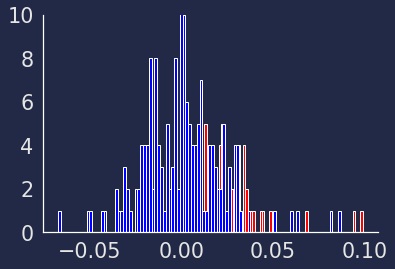

In [116]:
# Distribution of coefs for targets and non targets
plt.hist(coef[lm.ever_targetted], 100, color='red')
plt.hist(coef[~lm.ever_targetted], 100, color='blue')
plt.ylim(0,10)